# Application of different filter in an image

# LOW PASS FILTER OR AVERAGING FILTER 

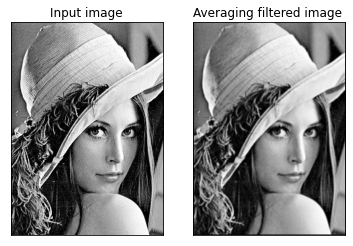

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
      
# Read the image
imgpath  = 'C:/Users/lena.jpg'
img = cv2.imread(imgpath,0)

m, n = img.shape
# Develop Averaging filter(3, 3) mask
ker = np.ones([3, 3], dtype = int)
ker = ker / 9
   
# Convolve the 3X3 mask over the image 
filtered_img = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        out = img[i-1, j-1]*ker[0, 0]+img[i-1, j]*ker[0, 1]+img[i-1, j + 1]*ker[0, 2]+img[i, j-1]*ker[1, 0]+ img[i, j]*ker[1, 1]+img[i, j + 1]*ker[1, 2]+img[i + 1, j-1]*ker[2, 0]+img[i + 1, j]*ker[2, 1]+img[i + 1, j + 1]*ker[2, 2]
         
        filtered_img[i, j]= out
          
filtered_img = filtered_img.astype(np.uint8)
output  = [img,filtered_img]
titles = ['Input image','Averaging filtered image ']
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()


using inbuilt function


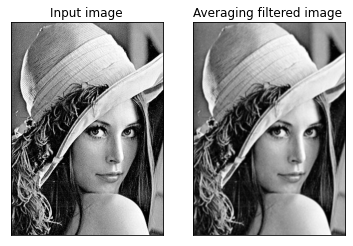

In [2]:
'''using inbuilt function '''
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
      
# Read the image
imgpath  = 'C:/Users/lena.jpg'
img1= cv2.imread(imgpath,0)

m, n = img1.shape
# Develop low pass filter or  Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9
   
# Convolve the 3X3 mask over the image 
img_new1 = cv2.filter2D(img1,-1,mask)
output  = [img1,img_new1]
titles = ['Input image','Averaging filtered image ']
print('using inbuilt function')
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()




# MEDIAN FILTER

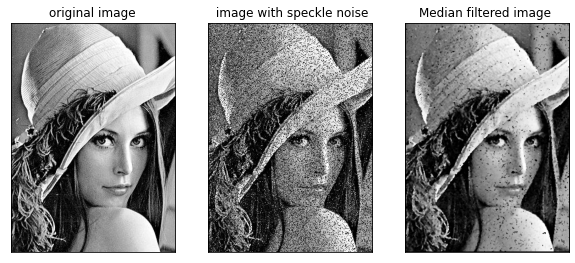

In [3]:
imgpath  = 'C:/Users/lena.jpg'
img1 = cv2.imread(imgpath,0)
'''Adding speckle noise '''
gaus = np.random.normal(0,1,img.size)
gaus = gaus.reshape(img.shape[0],img.shape[1]).astype('uint8')
# image with speckle noise
img = img1+img1*gaus

'''applying median filter '''
m, n = img.shape
   
filtered_img2= np.zeros([m, n])
  
for i in range(1, m-1):
    
    for j in range(1, n-1):
        
        out = [img[i-1, j-1], img[i-1, j],img[i-1, j + 1],img[i, j-1],img[i, j],img[i, j + 1],img[i + 1, j-1],img[i + 1, j],
               img[i + 1, j + 1]]
          
        out = sorted(out)
        filtered_img2[i, j]= out[4]
        
filtered_img2 = filtered_img2.astype(np.uint8)
output  = [img1,img,filtered_img2]
titles = ['original image',' image with speckle noise','Median filtered image ']
fig,axs = plt.subplots(1,3,figsize=(10,10))
for l in range(3):
    plt.subplot(1,3,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()

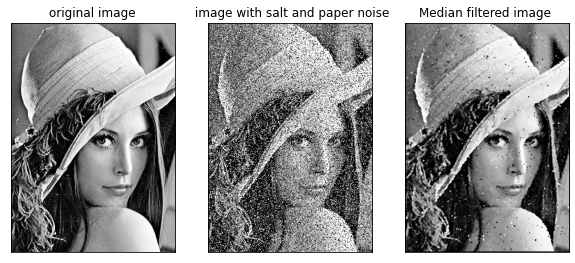

In [4]:
imgpath  = 'C:/Users/lena.jpg'
img1 = cv2.imread(imgpath,0)
from skimage.util import random_noise
'''Adding salt and paper noise to Image'''
noise_img = random_noise(img1, mode='s&p',amount=0.3)
 
#converting into uint 8
img = np.array(255*noise_img, dtype = 'uint8')

'''applying median filter on this image'''
m, n = img.shape
   
filtered_img2= np.zeros([m, n])
  
for i in range(1, m-1):
    
    for j in range(1, n-1):
        
        out = [img[i-1, j-1], img[i-1, j],img[i-1, j + 1],img[i, j-1],img[i, j],img[i, j + 1],img[i + 1, j-1],img[i + 1, j],
               img[i + 1, j + 1]]
          
        out = sorted(out)
        filtered_img2[i, j]= out[4]
        
filtered_img2 = filtered_img2.astype(np.uint8)
output  = [img1,img,filtered_img2]
titles = ['original image',' image with salt and paper noise','Median filtered image ']
fig,axs = plt.subplots(1,2,figsize=(10,10))
for l in range(3):
    plt.subplot(1,3,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()

# HIGH PASS FILTER

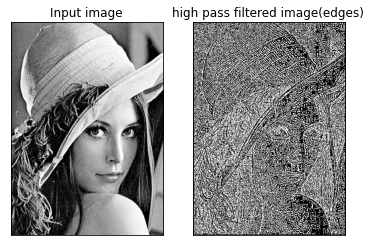

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
      
# Read the image
imgpath  = 'C:/Users/lena.jpg'
img = cv2.imread(imgpath,0)

m, n = img.shape
# Develop high pass filter(3, 3) mask
ker = np.array([[-1.0,-1.0,-1.0],[-1.0,8.0,-1.0],[-1.0,-1.0,-1.0]])
ker = ker/9
   
# Convolve the 3X3 mask over the image 
img_new = np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        out = img[i-1, j-1]*ker[0, 0]+img[i-1, j]*ker[0, 1]+img[i-1, j + 1]*ker[0, 2]+img[i, j-1]*ker[1, 0]+ img[i, j]*ker[1, 1]+img[i, j + 1]*ker[1, 2]+img[i + 1, j-1]*ker[2, 0]+img[i + 1, j]*ker[2, 1]+img[i + 1, j + 1]*ker[2, 2]
         
        filtered_img[i, j]= out
          
filtered_img = filtered_img.astype(np.uint8)
output  = [img,filtered_img]
titles = ['Input image','high pass filtered image(edges) ']
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Gaussian filter : Smoothing filter 

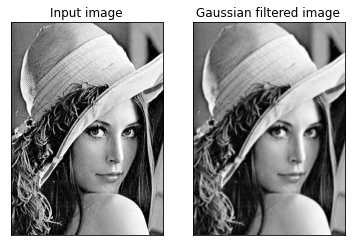

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
      
# Read the image
imgpath  = 'C:/Users/lena.jpg'
img = cv2.imread(imgpath,0)

m, n = img.shape
# Develope gausian  filter(5, 5) mask
ker = np.array([[1.0,4.0,7.0,4.0,1.0],[4.0,16.0,26.0,16.0,4.0],[7.0,26.0,41.0,26.0,7.0],[4.0,16.0,26.0,16.0,4.0],[1.0,4.0,7.0,4.0,1.0]])
ker=ker/273
img_new1 = cv2.filter2D(img,-1,ker)
output  = [img,img_new1]
titles = ['Input image','Gaussian filtered image ']

for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()




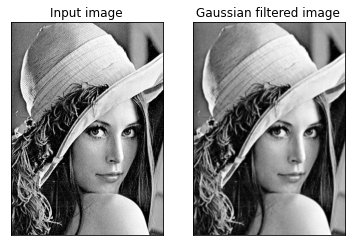

In [7]:
from scipy.signal import gaussian, convolve2d
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h
ker = gaussian_kernel(3)
img_new1 = cv2.filter2D(img,-1,ker)
# Display the image
output  = [img,img_new1]
titles = ['Input image','Gaussian filtered image ']

for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Laplacian Filter 

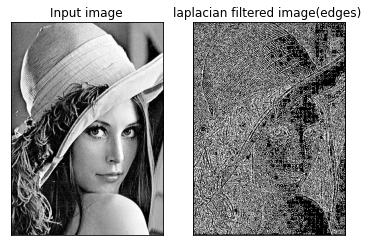

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
      
# Read the image
imgpath  = 'C:/Users/lena.jpg'
img = cv2.imread(imgpath,0)

m, n = img.shape
# Develop high pass filter(3, 3) mask
ker = np.array([[0.0,-1.0,0.0],[-1.0,4.0,-1.0],[0.0,-1.0,0.0]])
ker=ker/9   
# Convolve the 3X3 mask over the image 
filtered_img= np.zeros([m, n])
  
for i in range(1, m-1):
    for j in range(1, n-1):
        out = img[i-1, j-1]*ker[0, 0]+img[i-1, j]*ker[0, 1]+img[i-1, j + 1]*ker[0, 2]+img[i, j-1]*ker[1, 0]+ img[i, j]*ker[1, 1]+img[i, j + 1]*ker[1, 2]+img[i + 1, j-1]*ker[2, 0]+img[i + 1, j]*ker[2, 1]+img[i + 1, j + 1]*ker[2, 2]
         
        filtered_img[i, j]= out
          
filtered_img = filtered_img.astype(np.uint8)
output  = [img,filtered_img]
titles = ['Input image','laplacian filtered image(edges) ']
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()

# Max FIlter 

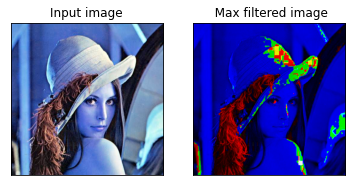

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def max_filter(image):
    
    (B,G,R) = cv2.split(image)
    M = np.maximum(np.maximum(R,G),B)
    R[R<M] = 0
    G[G<M] = 0
    B[B<M] = 0
    return cv2.merge([B,G,R])
imgpath  = 'C:/Users/imh.jpg'
img = cv2.imread(imgpath)
filtered_img = max_filter(img)
output  = [img,filtered_img]
titles = ['Input image','  Max filtered image ']
for l in range(2):
    plt.subplot(1,2,l+1)
    plt.imshow(output[l],cmap = 'gray')
    plt.title(titles[l])
    plt.xticks([])
    plt.yticks([])
plt.show()


# WIENER FILTER

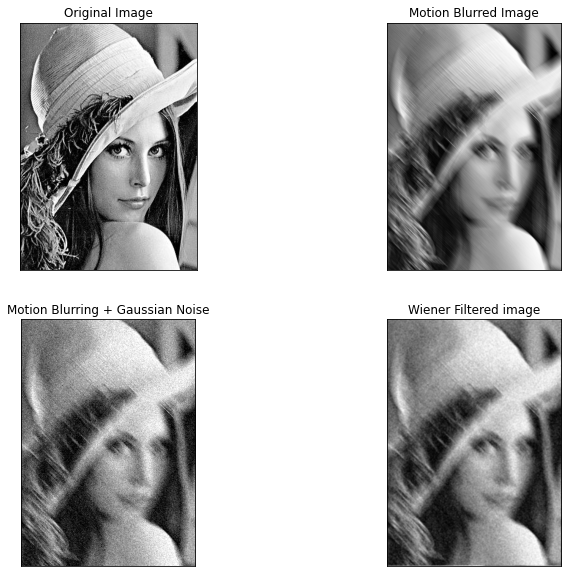

In [10]:
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt

def blur(img, kernel_size = 3):
    temp = np.copy(img)
    h = np.eye(kernel_size) / kernel_size
    temp = convolve2d(temp, h, mode = 'valid')
    return temp

def gauss_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    temp = np.copy(img)
    temp = fft2(temp)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    temp = temp * kernel
    temp = np.abs(ifft2(temp))
    return temp

def gauss_ker(ker_size = 3):
    h = gaussian(ker_size, ker_size / 3).reshape(ker_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h


if __name__ == '__main__':
    # Load image 
    file_name =  'C:/Users/lena.jpg'
    img = plt.imread(file_name)

# Blur the image
blurred_img = blur(img, kernel_size = 15)

# Add Gaussian noise to blurred image 
noisy_img = gauss_noise(blurred_img, sigma = 20)

# Apply Wiener Filter to the noisy image 
kernel = gauss_ker(3)
filtered_img = wiener_filter(noisy_img, kernel, K = 10)

# Display results
output = [img, blurred_img, noisy_img, filtered_img]
titles = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filtered image']

fig = plt.figure(figsize=(12, 10))

for i in range(len(output)):
    fig.add_subplot(1, 4, i+1)
    plt.imshow(output[i], cmap = 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()
